In [16]:
pip install kaggle

In [17]:
# configure path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Dog vs Cat dataset

In [18]:
!kaggle competitions download -c dogs-vs-cats


In [19]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [20]:
# extracting the compressed file
from zipfile import ZipFile

dataset='dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [22]:
# for train file, extract
from zipfile import ZipFile

dataset='train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [23]:
import os
# count number of files in train folder
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print('Number of images: ',file_count)

Number of images:  25000


Printing names of images

In [24]:
file_names=os.listdir('/content/train')
print(file_names)

['dog.5451.jpg', 'dog.10638.jpg', 'dog.5842.jpg', 'cat.9719.jpg', 'cat.1275.jpg', 'cat.10043.jpg', 'dog.9631.jpg', 'dog.4802.jpg', 'dog.11137.jpg', 'cat.2041.jpg', 'dog.3801.jpg', 'cat.2605.jpg', 'dog.11468.jpg', 'cat.1052.jpg', 'dog.700.jpg', 'dog.10359.jpg', 'dog.10749.jpg', 'cat.5904.jpg', 'dog.11214.jpg', 'dog.4910.jpg', 'cat.963.jpg', 'dog.4431.jpg', 'dog.11457.jpg', 'cat.5456.jpg', 'dog.1447.jpg', 'dog.3629.jpg', 'dog.6618.jpg', 'dog.4513.jpg', 'dog.4954.jpg', 'cat.5576.jpg', 'dog.5425.jpg', 'dog.2507.jpg', 'dog.7894.jpg', 'dog.6182.jpg', 'dog.3550.jpg', 'cat.120.jpg', 'dog.707.jpg', 'dog.2718.jpg', 'dog.590.jpg', 'dog.5226.jpg', 'dog.1757.jpg', 'dog.6951.jpg', 'cat.10305.jpg', 'dog.1606.jpg', 'cat.56.jpg', 'dog.4433.jpg', 'dog.7632.jpg', 'dog.5873.jpg', 'cat.6699.jpg', 'cat.1439.jpg', 'cat.12014.jpg', 'cat.479.jpg', 'dog.2364.jpg', 'dog.7057.jpg', 'cat.6619.jpg', 'cat.6884.jpg', 'dog.2432.jpg', 'dog.8012.jpg', 'dog.122.jpg', 'dog.7774.jpg', 'dog.8295.jpg', 'dog.1346.jpg', 'cat.1

Importing the needed libraries

In [25]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


Display images of dogs and cats

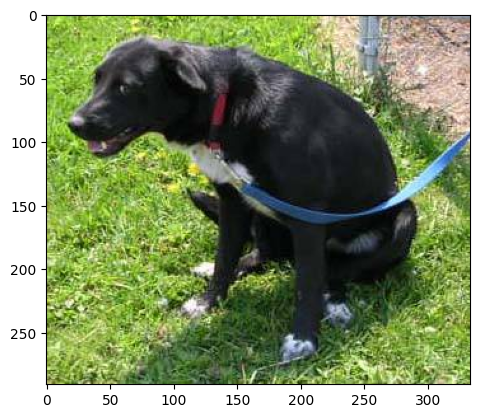

In [26]:
# display dog image
img=mpimg.imread('/content/train/dog.1391.jpg')
imgplot=plt.imshow(img)
plt.show()

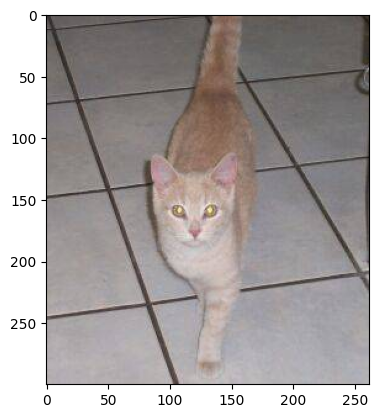

In [27]:
# display cat image
img=mpimg.imread('/content/train/cat.5308.jpg')
imgplot=plt.imshow(img)
plt.show()

In [30]:
file_names = os.listdir('/content/train/')

for i in range(5):
  name=file_names[i]
  print(name[0:3])

dog
dog
dog
cat
cat


In [38]:
file_names = os.listdir('/content/train/')

dog_count=0
cat_count=0

for img_file in file_names:
  name=img_file[0:3]

  if(name=='dog'):
    dog_count+=1
  else:
    cat_count+=1
print(dog_count)
print(cat_count)

12500
12500


Resizing images to 224

In [ ]:
os.mkdir('/content/image resized')

In [46]:
# creating directory for resized images


original_folder = '/content/train/'
resized_folder = '/content/image resized/'

# taking only first 2000 images
for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath=resized_folder+filename
  img.save(newImgPath)

In [49]:
file_names=os.listdir('/content/image resized')
print(file_names)

['dog.5451.jpg', 'dog.10638.jpg', 'dog.5842.jpg', 'cat.9719.jpg', 'cat.1275.jpg', 'cat.10043.jpg', 'dog.9631.jpg', 'dog.4802.jpg', 'dog.11137.jpg', 'cat.2041.jpg', 'dog.3801.jpg', 'cat.2605.jpg', 'dog.11468.jpg', 'cat.1052.jpg', 'dog.700.jpg', 'dog.10359.jpg', 'dog.10749.jpg', 'cat.5904.jpg', 'dog.11214.jpg', 'dog.4910.jpg', 'cat.963.jpg', 'dog.4431.jpg', 'dog.11457.jpg', 'cat.5456.jpg', 'dog.1447.jpg', 'dog.3629.jpg', 'dog.6618.jpg', 'dog.4513.jpg', 'dog.4954.jpg', 'cat.5576.jpg', 'dog.5425.jpg', 'dog.2507.jpg', 'dog.7894.jpg', 'dog.6182.jpg', 'dog.3550.jpg', 'cat.120.jpg', 'dog.707.jpg', 'dog.2718.jpg', 'dog.590.jpg', 'dog.5226.jpg', 'dog.1757.jpg', 'dog.6951.jpg', 'cat.10305.jpg', 'dog.1606.jpg', 'cat.56.jpg', 'dog.4433.jpg', 'dog.7632.jpg', 'dog.5873.jpg', 'cat.6699.jpg', 'cat.1439.jpg', 'cat.12014.jpg', 'cat.479.jpg', 'dog.2364.jpg', 'dog.7057.jpg', 'cat.6619.jpg', 'cat.6884.jpg', 'dog.2432.jpg', 'dog.8012.jpg', 'dog.122.jpg', 'dog.7774.jpg', 'dog.8295.jpg', 'dog.1346.jpg', 'cat.1

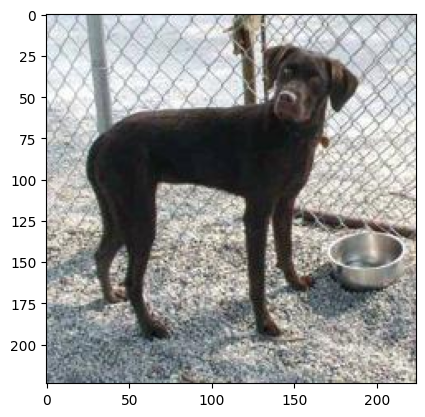

In [53]:
# resized image
img=mpimg.imread('/content/image resized/dog.5451.jpg')
imgplot=plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat --> 0
Dog --> 1

In [54]:
labels=[]
filenames=os.listdir('/content/image resized/')
for i in range(2000):
  filename=filenames[i]
  label=filename[0:3]

  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)


In [58]:
print(labels)

[1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 

In [60]:
dogcount=0
catcount=0
for i in range(2000):
  if(labels[i]==1):
    dogcount+=1
  else:
    catcount+=1
print('dogcount = ',dogcount)
print('catcount = ',catcount)

dogcount =  975
catcount =  1025


CONVERTING IMAGES TO NUMPY ARRAY

In [61]:
import cv2
import glob


In [65]:
image_dir='/content/image resized/'
image_extension=['png','jpg']

files=[]
[files.extend(glob.glob(image_dir+'*.'+e)) for e in image_extension ]

dog_cat_imgs=np.asarray([cv2.imread(file) for file in files])


In [66]:
print(dog_cat_imgs)

[[[[227 214 206]
   [233 220 212]
   [234 221 213]
   ...
   [139 134 133]
   [144 139 138]
   [192 187 186]]

  [[243 230 222]
   [232 219 211]
   [233 220 212]
   ...
   [146 141 140]
   [196 191 190]
   [202 197 196]]

  [[246 234 228]
   [234 222 216]
   [235 223 217]
   ...
   [185 180 179]
   [196 191 190]
   [195 190 189]]

  ...

  [[134 125 115]
   [107  98  88]
   [128 119 109]
   ...
   [188 200 202]
   [201 214 216]
   [150 163 165]]

  [[110 101  91]
   [ 93  84  74]
   [132 123 113]
   ...
   [158 171 173]
   [152 165 167]
   [113 126 128]]

  [[139 130 120]
   [127 118 108]
   [165 156 146]
   ...
   [212 225 227]
   [190 203 205]
   [157 170 172]]]


 [[[  4   2   2]
   [ 22  20  20]
   [ 20  18  18]
   ...
   [ 12  13  11]
   [  2   3   1]
   [  7   8   6]]

  [[  3   1   1]
   [ 14  12  12]
   [ 19  17  17]
   ...
   [  7   8   6]
   [  2   3   1]
   [  8   9   7]]

  [[  8   6   6]
   [  6   4   4]
   [ 18  16  16]
   ...
   [  3   4   2]
   [  3   4   2]
   [  7   8

In [71]:
print(dog_cat_imgs.shape)

(2000, 224, 224, 3)


In [72]:
X = dog_cat_imgs
Y = np.asarray(labels)



TRAIN TEST SPLIT

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [74]:
print(X.shape,x_train.shape,x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 training images (80%)

400 test images (20%)

0 - black
255 - white

In [77]:
# scaling the data (converting from 0-255 range to 0-1 range)

x_train_scaled=x_train/255
x_test_scaled=x_test/255




In [78]:
print(x_train_scaled)
print(x_test_scaled)

[[[[0.36470588 0.37254902 0.37254902]
   [0.36862745 0.37647059 0.37647059]
   [0.36862745 0.37647059 0.37647059]
   ...
   [0.05490196 0.06666667 0.18823529]
   [0.05490196 0.06666667 0.18823529]
   [0.05490196 0.06666667 0.18823529]]

  [[0.37254902 0.38039216 0.38039216]
   [0.36862745 0.37647059 0.37647059]
   [0.36862745 0.37647059 0.37647059]
   ...
   [0.05490196 0.06666667 0.18823529]
   [0.05490196 0.06666667 0.18823529]
   [0.05490196 0.06666667 0.18823529]]

  [[0.38039216 0.38823529 0.38823529]
   [0.37254902 0.38039216 0.38039216]
   [0.36470588 0.37254902 0.37254902]
   ...
   [0.05490196 0.06666667 0.18823529]
   [0.05490196 0.06666667 0.18823529]
   [0.05490196 0.06666667 0.18823529]]

  ...

  [[0.09019608 0.09803922 0.09803922]
   [0.09411765 0.10196078 0.10196078]
   [0.09411765 0.10196078 0.10196078]
   ...
   [0.17647059 0.19215686 0.19607843]
   [0.17647059 0.19215686 0.19607843]
   [0.16470588 0.18039216 0.18431373]]

  [[0.09803922 0.10588235 0.10588235]
   [0.1

BUILDING THE NEURAL NETWORK USING **MOBILENET V2**


In [93]:
import tensorflow as tf
import tensorflow_hub as hub

In [94]:
!pip install tf_keras
import tf_keras

In [95]:
mobilenet_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [96]:
number_of_classes=2

model=tf_keras.Sequential([
    pretrained_model,
    tf_keras.layers.Dense(number_of_classes,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [97]:
model.compile(
    optimizer='adam',
    loss=tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

x_train contains the images in pixel (np array) format

y_train contains the labels for output

In [99]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 59s 1s/step - loss: 0.0978 - acc: 0.9650
Epoch 2/5
50/50 [==============================] - 59s 1s/step - loss: 0.0618 - acc: 0.9775
Epoch 3/5
50/50 [==============================] - 59s 1s/step - loss: 0.0491 - acc: 0.9844
Epoch 4/5
50/50 [==============================] - 58s 1s/step - loss: 0.0392 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 57s 1s/step - loss: 0.0327 - acc: 0.9887


In [100]:
score,acc=model.evaluate(x_test_scaled,y_test)
print("Test Loss =",score)
print("Finaly Accuracy = ",acc)

/usr/local/lib/python3.11/dist-packages/tf_keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 [==============================] - 15s 1s/step - loss: 0.0874 - acc: 0.9675
Test Loss = 0.08743251115083694
Finaly Accuracy =  0.9674999713897705


**NOW WE ACCEPT AN IMAGE TO CLASSIFY**

Path of image: /content/dog.jpg


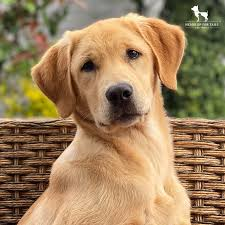

1/1 [==============================] - 0s 67ms/step
[[1.7148828e-04 9.9982846e-01]]
Image is of a Dog


In [108]:
input_img_path=input('Path of image: ')
input_img=cv2.imread(input_img_path)
cv2_imshow(input_img)

input_image_rezised=cv2.resize(input_img,(224,224))

input_image_scaled=input_image_rezised/255

image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

print(input_prediction)
if(input_pred_label==0):
  print("Image is of a Cat")
else:
  print("Image is of a Dog")